# Training a simple perceptron

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
import tensorflow
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

speed_data = pd.read_csv("speed_decision_data.csv")

In [22]:
speed_data.head()

,1 - Distance From Bump,Height of Bump,Speed
0,0.575374,0.680337,0
1,0.376002,0.278661,1
2,0.973890,0.741585,0
3,0.310378,0.342374,1
4,0.109521,0.268304,1


<AxesSubplot:xlabel='1 - Distance From Bump', ylabel='Height of Bump'>

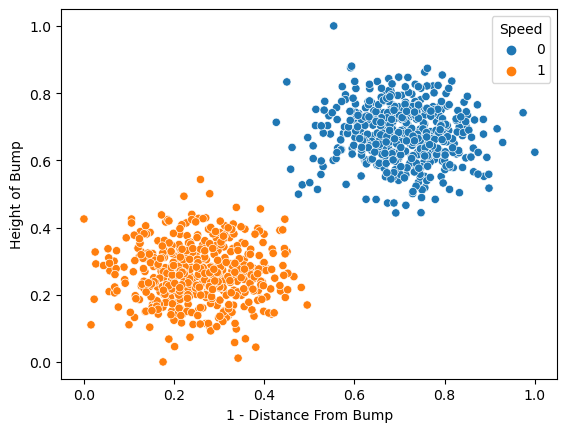

In [27]:
sns.scatterplot(x = speed_data['1 - Distance From Bump'], y = speed_data['Height of Bump'], hue = speed_data['Speed'])

In [28]:
X_train = speed_data[['1 - Distance From Bump', 'Height of Bump']]

In [29]:
y_train = speed_data['Speed']

### Build the neural network
- 'Adam' optimizer is a gradient-descent algorithm that uses the gradient to train the network
- 'Adam' optimizer uses backpropagation algorithm to compute the gradient of the function

In [31]:
# Define and fit the model
model = Sequential()

# 'dense' means 'fully connected layers' to neural 
# 'input_dim=2' -> we have two inputs: height of bump, distance from bump 
model.add(Dense(1, input_dim=2, activation='sigmoid'))

# Choose 'binary_crossentropy' as loss function because we have one output with binary value of 0 or 1
model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 0.6051 - 432ms/epoch - 14ms/step
Epoch 2/100
32/32 - 0s - loss: 0.6001 - 18ms/epoch - 562us/step
Epoch 3/100
32/32 - 0s - loss: 0.5951 - 19ms/epoch - 592us/step
Epoch 4/100
32/32 - 0s - loss: 0.5903 - 18ms/epoch - 562us/step
Epoch 5/100
32/32 - 0s - loss: 0.5855 - 18ms/epoch - 563us/step
Epoch 6/100
32/32 - 0s - loss: 0.5808 - 19ms/epoch - 580us/step
Epoch 7/100
32/32 - 0s - loss: 0.5761 - 19ms/epoch - 594us/step
Epoch 8/100
32/32 - 0s - loss: 0.5715 - 18ms/epoch - 562us/step
Epoch 9/100
32/32 - 0s - loss: 0.5669 - 18ms/epoch - 562us/step
Epoch 10/100
32/32 - 0s - loss: 0.5624 - 19ms/epoch - 594us/step
Epoch 11/100
32/32 - 0s - loss: 0.5579 - 18ms/epoch - 563us/step
Epoch 12/100
32/32 - 0s - loss: 0.5535 - 19ms/epoch - 594us/step
Epoch 13/100
32/32 - 0s - loss: 0.5490 - 18ms/epoch - 571us/step
Epoch 14/100
32/32 - 0s - loss: 0.5446 - 19ms/epoch - 594us/step
Epoch 15/100
32/32 - 0s - loss: 0.5403 - 20ms/epoch - 613us/step
Epoch 16/100
32/32 - 0s - loss: 0.

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Make prediction
y_train_predict = (model.predict(X_train) > 0.5).astype("int32")

32/32 [==============================] - 0s 516us/step


### Time to assess the performance of the network based on training set

<AxesSubplot:>

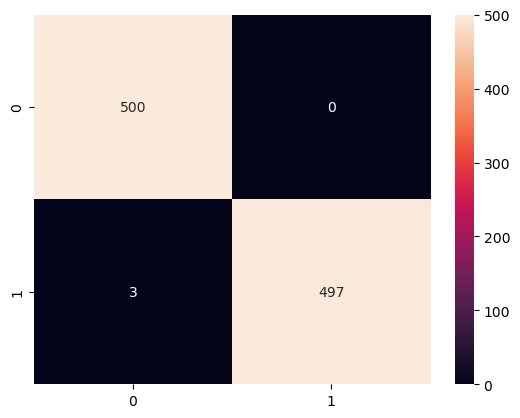

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_train_predict)

sns.heatmap(cm, annot=True, fmt="d")

The network correctly classfied 500 (top left) and correctly classfied 497 (bottom right).
However, it misclassified 3 (bottom left)

313/313 [==============================] - 0s 496us/step


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


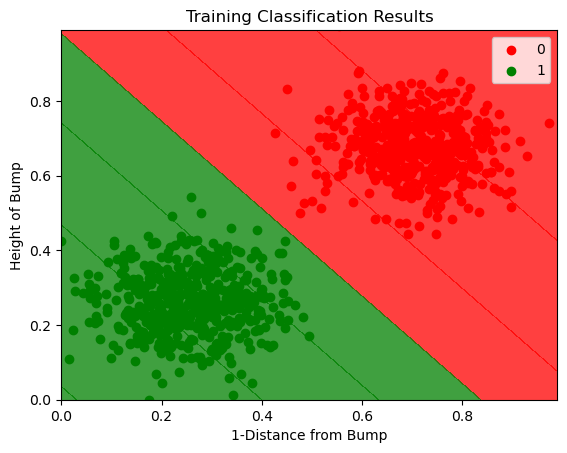

In [38]:
# Visualising the Training set results

from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train.values, y_train.values

# Create a meshgrid
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() , stop = X_grid[:, 0].max(), step = 0.01),
                     np.arange(start = X_grid[:, 1].min(), stop = X_grid[:, 1].max(), step = 0.01))

# Do the prediction
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Training Classification Results')
plt.xlabel('1-Distance from Bump')
plt.ylabel('Height of Bump')
plt.legend()
plt.show()

In [39]:
weights, biases = model.layers[0].get_weights()

In [40]:
weights

array([[-2.9712155],
       [-2.5374496]], dtype=float32)

In [41]:
biases

array([2.286755], dtype=float32)